## RQ1 (Linear Regression):
How do temperature, fuel prices, and unemployment affect weekly sales performance?

### Hypothesis: 
Weekly sales can be predicted using a multilinear regression model with temperature, fuel price, and unemployment as predictors.

### Linear Regression

Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables, by fitting a straight line to the observed data points. It helps to quantify and analyze the association between variables, making predictions and understanding the trends of data.

Linear regression can be seen as a straight line through dots on a graph. It is used to see the relationship between variables, for example in this project, we will look at when multiple variables change, weekly sales will increase. It is a way to predict one thing based on another, with the use of a straight line.

### When to Use Linear Regression

**Linear regression is used when:**

- The relationship between the dependent and independent variables is approximately linear.
- You want to predict a continuous numeric output.
- The dataset has minimal multicollinearity (independent variables are not highly correlated).
- The residuals (errors) are normally distributed and have constant variance.
- You need a simple and interpretable model to understand the impact of predictors on the target variable.

In [1]:
# For data storage and manipulation
import pandas as pd

In [2]:
# for diagramming
import seaborn as sns

In [3]:
# for ML methods and algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt


### Loading and reading the data

* Using the already cleaned dataset, might remove more outliers if necessary.

In [4]:
df = pd.read_csv("../Data/Cleaned-Walmart_Sales.csv")
df.info()
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5923 entries, 0 to 5922
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         5923 non-null   int64  
 1   Date          5923 non-null   object 
 2   Weekly_Sales  5923 non-null   float64
 3   Holiday_Flag  5923 non-null   int64  
 4   Temperature   5923 non-null   float64
 5   Fuel_Price    5923 non-null   float64
 6   CPI           5923 non-null   float64
 7   Unemployment  5923 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 370.3+ KB


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
3040,23,13-05-2011,1254914.87,0,55.12,4.095,134.593000,4.781
4761,36,30-12-2011,287425.22,1,48.26,3.132,218.230236,7.716
4892,37,07-10-2011,522816.85,0,71.20,3.285,215.783133,7.716
1946,15,09-03-2012,545120.67,0,36.97,4.021,137.506690,7.943
3230,25,07-05-2010,724468.97,0,63.67,2.966,203.610178,7.856


### Summary of the dataset
* **Store:** Store number.
* **Date:** Sales week start date.
* **Weekly_Sales:** Total sales for the week.
* **Holiday_Flag:** A binary flag indicating whether the week includes a holiday (1) or not (0).
* **Temperature:** Air temperature in the region.
* **Fuel_Price:** Fuel cost in the region.
* **CPI:** Consumer Price Index.
* **Unemployment:** Unemployment rate.

### Dropping non-relevant columns
* We dropped `Date` because it's not a predictive variable in its current format.

* We also removed `Store` since it's categorical and not used in this basic regression model.

In [5]:
df = df.drop(columns=['Date', 'Store'])

### Converting all ints into floats

In [6]:
df = df.astype({col: 'float' for col in df.select_dtypes(include=['int', 'float']).columns})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5923 entries, 0 to 5922
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Weekly_Sales  5923 non-null   float64
 1   Holiday_Flag  5923 non-null   float64
 2   Temperature   5923 non-null   float64
 3   Fuel_Price    5923 non-null   float64
 4   CPI           5923 non-null   float64
 5   Unemployment  5923 non-null   float64
dtypes: float64(6)
memory usage: 277.8 KB


In [8]:
df.shape

(5923, 6)

In [9]:
list(df)

['Weekly_Sales',
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment']

### Checking for null values

In [10]:
df.isnull().sum()

Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

## Visualization

### Pairplot

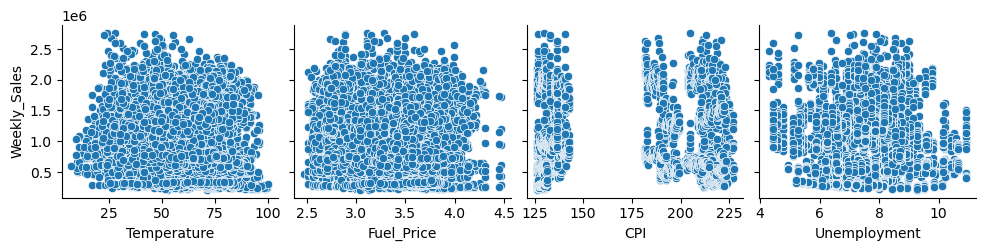

In [11]:
sns.pairplot(df, x_vars=['Temperature', 'Fuel_Price', 'CPI', 'Unemployment'], 
             y_vars=['Weekly_Sales'], kind='scatter')

This pairplot displays scatter plots between `Weekly_Sales` and the key features: `Temperature`, `Fuel_Price`, `CPI`, and `Unemployment`.

#### Interpretation:
* We observe **no strong linear relationship** in any of the scatterplots.
* Most of the data points are widely scattered, especially for `CPI` and `Fuel_Price`.
* This suggests that these variables alone may not be reliable predictors of weekly sales.

### Histogram

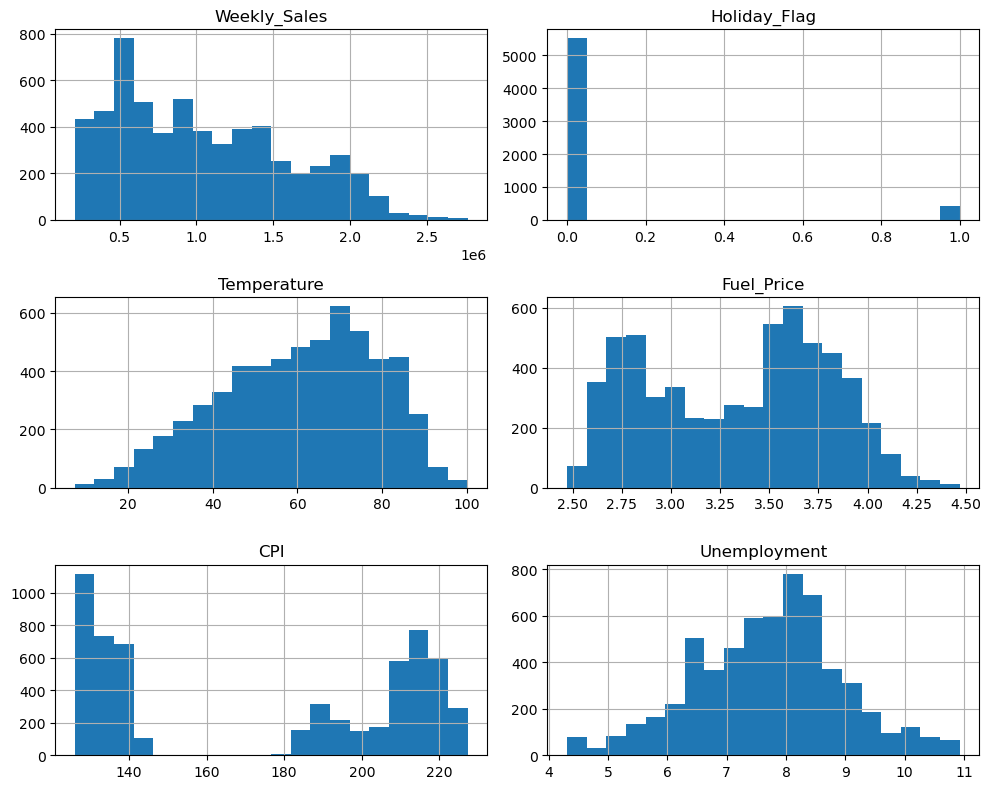

In [12]:
df.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

These histograms show the distribution of each feature (e.g., `Temperature`, `Fuel_Price`, etc.)

#### Interpretation:
* `Temperature` appears to be **normally distributed**.
* `Unemployment` is **right-skewed**, indicating most values fall on the lower side.
* `Fuel_Price` has a **multimodal distribution**, possibly due to market fluctuations or seasonality.

### Plot distribution

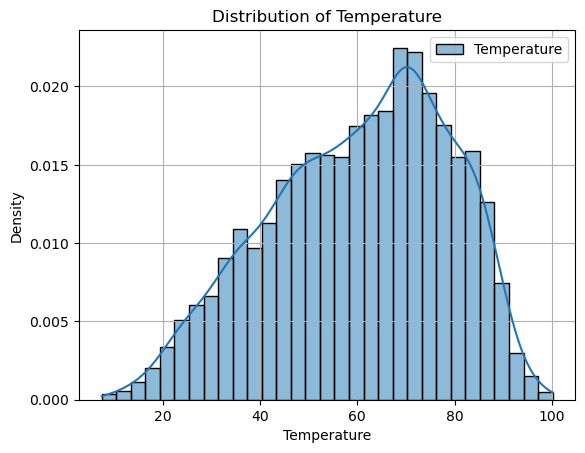

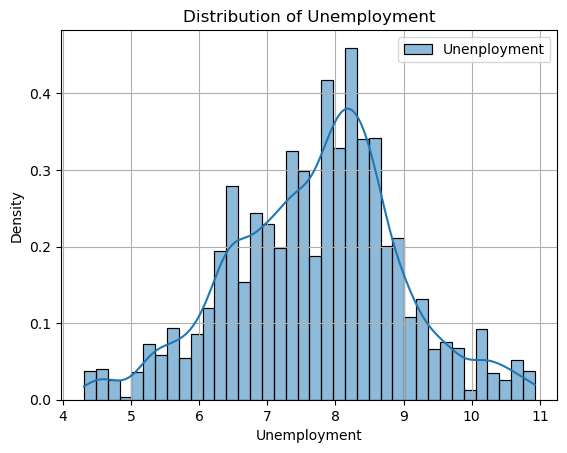

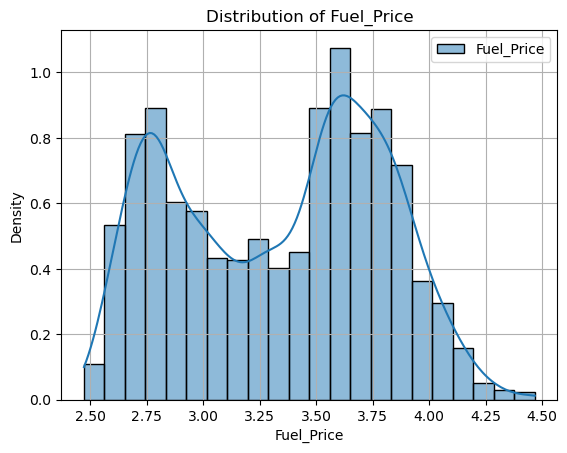

In [13]:
# Plot distribution for Temperature
sns.histplot(df['Temperature'], label='Temperature', kde=True, stat="density")
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

# Plot distribution for Unemployment
sns.histplot(df['Unemployment'], label='Unenployment', kde=True, stat="density")
plt.title('Distribution of Unemployment')
plt.xlabel('Unemployment')
plt.legend()
plt.grid(True)
plt.show()

# Plot distribution for Fuel_Price
sns.histplot(df['Fuel_Price'], label='Fuel_Price', kde=True, stat="density")
plt.title('Distribution of Fuel_Price')
plt.xlabel('Fuel_Price')
plt.legend()
plt.grid(True)
plt.show()

#### Temperature:
* A bell-shaped curve suggests a natural variation around a mean.
#### Unemployment:
* Slightly skewed with a peak around ~7%.
#### Fuel_Price:
* Distinct bumps indicate pricing clusters.

In [14]:
df.describe()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,5.923000e+03,5923.000000,5923.000000,5923.000000,5923.000000,5923.000000
mean,1.041038e+06,0.069053,60.409046,3.340349,175.005846,7.721439
std,5.543193e+05,0.253565,18.397096,0.458072,39.024239,1.243295
min,2.099862e+05,0.000000,7.460000,2.472000,126.064000,4.308000
25%,5.527446e+05,0.000000,46.945000,2.889000,132.763355,6.891000
50%,9.478151e+05,0.000000,62.590000,3.417000,190.006988,7.852000
75%,1.428915e+06,0.000000,74.715000,3.720500,213.791715,8.494000
max,2.760347e+06,1.000000,100.140000,4.468000,227.232807,10.926000


### Boxplot

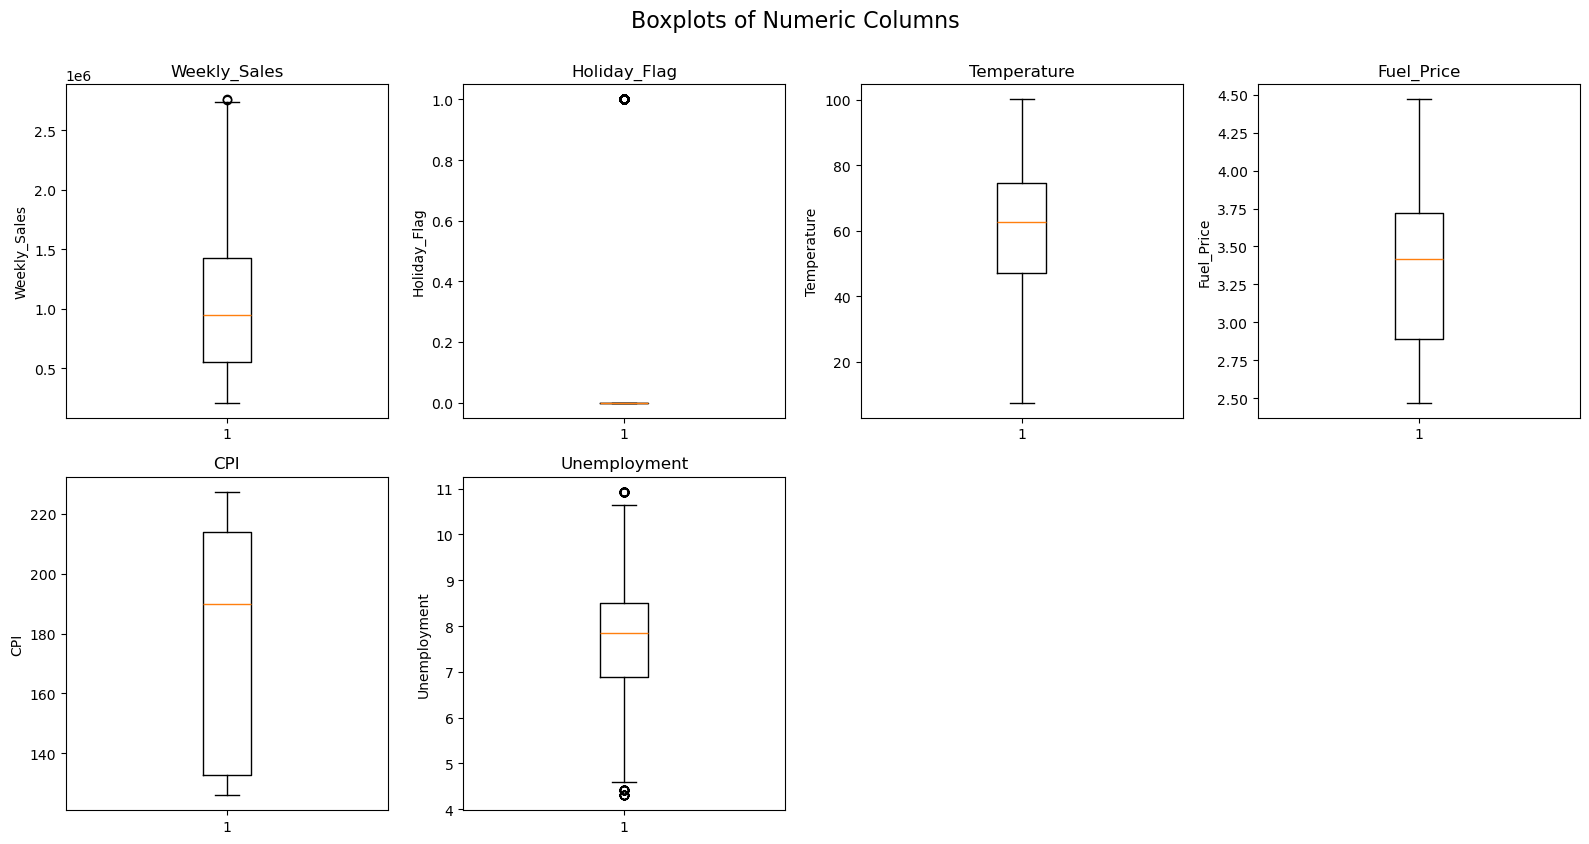

In [15]:
numeric_cols = df.select_dtypes(include=['number']).columns

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, column in enumerate(numeric_cols):
    axes[i].boxplot(df[column].dropna())
    axes[i].set_title(column)
    axes[i].set_ylabel(column)

for j in range(len(numeric_cols), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.suptitle('Boxplots of Numeric Columns', fontsize=16, y=1.05)
plt.show()

Boxplots help detect **outliers** and **distribution shape** for each feature.

#### Interpretation:
- `Weekly_Sales` has several **high outliers**.
- `Fuel_Price` and `CPI` appear relatively stable with minor spread.
- `Temperature` has a few mild outliers on both ends.

#### Removing Weekly Sales outliers

In [16]:
# Store original row count
rows_before = len(df)

# IQR method to remove outliers in Weekly_Sales
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['Weekly_Sales'] >= lower_bound) & (df['Weekly_Sales'] <= upper_bound)]

# Print summary
rows_after = len(df)
print(f"Rows before: {rows_before}")
print(f"Rows after:  {rows_after}")
print(f"Rows removed: {rows_before - rows_after}")


Rows before: 5923
Rows after:  5921
Rows removed: 2


### Correlation and Heatmap

Correlation helps to identify the strength and direction of the relationship between variables. By calculating the correlation matrix, we can understand how different features in the dataset are related to each other and to the target variable, `Weekly_Sales`.

* A perfect positive linear correlation = 1
* A perfect negative linear correlation = -1
* No linear correlation = 0

The closer the correlations are to 1 or -1, the better.

A heatmap is a visual representation of the correlation matrix, making it easier to interpret the relationships. It highlights strong positive or negative correlations, which can guide feature selection and provide insights into the data.

In [17]:
corr_matrix = df.corr()
corr_matrix

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Weekly_Sales,1.000000,0.023748,-0.043659,0.018634,-0.083841,-0.074313
Holiday_Flag,0.023748,1.000000,-0.156949,-0.076425,-0.000348,0.011158
Temperature,-0.043659,-0.156949,1.000000,0.145281,0.218293,0.024921
Fuel_Price,0.018634,-0.076425,0.145281,1.000000,-0.144391,-0.104825
CPI,-0.083841,-0.000348,0.218293,-0.144391,1.000000,-0.218515
Unemployment,-0.074313,0.011158,0.024921,-0.104825,-0.218515,1.000000


In [18]:
corr = df.corr()['Weekly_Sales'].sort_values(ascending=False)
print(corr)

Weekly_Sales    1.000000
Holiday_Flag    0.023748
Fuel_Price      0.018634
Temperature    -0.043659
Unemployment   -0.074313
CPI            -0.083841
Name: Weekly_Sales, dtype: float64


<Axes: >

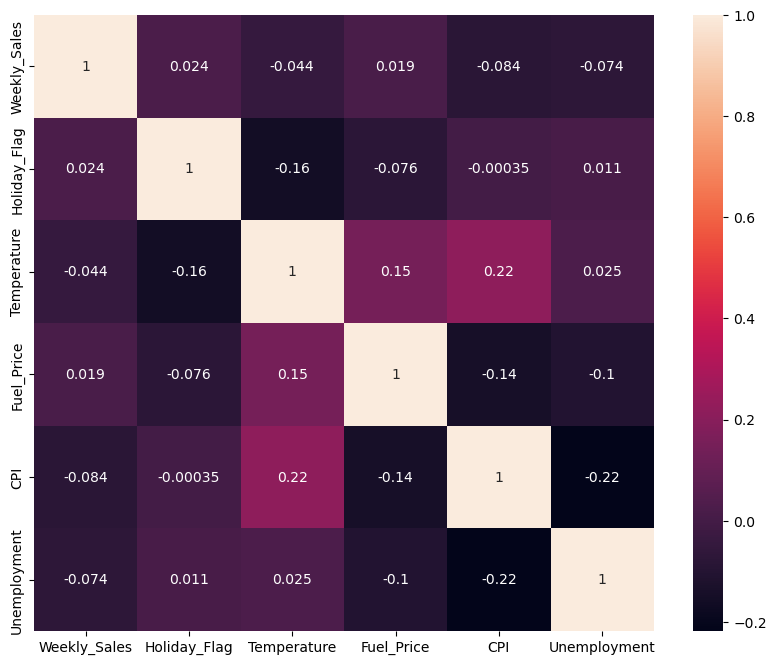

In [19]:
plt.subplots(figsize = (10, 8))
sns.heatmap(corr_matrix, annot=True)

**These correlations suggest that:**

* None of the predictors (`Temperature`, `Fuel_Price` & `CPI`) have strong linear correlation with `Weekly_Sales`.

* `CPI` & `Temperature` have a noticeable negative correlation (-0.22)

**Expectations:**

A linear model will probably not perform very well with this dataset

### Prepare the data

In [20]:
# Features
feature_cols = ['Temperature', 'Fuel_Price', 'Unemployment']

X = df[feature_cols]

X.head()

,Temperature,Fuel_Price,Unemployment
0,42.31,2.572,8.106
1,38.51,2.548,8.106
2,39.93,2.514,8.106
3,46.63,2.561,8.106
4,46.50,2.625,8.106


In [21]:
y = df['Weekly_Sales']

y.head()

0    1643690.90
1    1641957.44
2    1611968.17
3    1409727.59
4    1554806.68
Name: Weekly_Sales, dtype: float64

In [22]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(5921, 3)


In [23]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(5921,)


### Splitting the data into training and testing sets

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [25]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4440, 3)
(4440,)
(1481, 3)
(1481,)


In [26]:
y_test.head()

3062    1257778.34
3737     507335.75
1968     590453.63
234     1920725.15
1621    1895583.12
Name: Weekly_Sales, dtype: float64

In [27]:
X_test.head()

,Temperature,Fuel_Price,Unemployment
3062,56.79,3.583,4.420
3737,77.79,3.882,9.863
1968,73.99,3.863,8.193
234,59.33,3.297,7.441
1621,43.85,3.683,7.193


### Create a model

In [28]:
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

In [29]:
print('b0 =', linreg.intercept_)
print('bi =', linreg.coef_)

b0 = 1339993.8819661215
bi = [ -1379.12024157  11461.15996279 -33158.53325331]


In [30]:
list(zip(feature_cols, linreg.coef_))

[('Temperature', -1379.120241574179),
 ('Fuel_Price', 11461.15996279268),
 ('Unemployment', -33158.533253309)]

### Coefficient Interpretation

* b0 = Predicted value of `Weekly_Sales` when all features are 0 (`Temperature`, `Fuel_Price` & `Unemployment` = 0)
* b0 = 1339993 means that if all inputs were zero, the model would predict $1,339,993 in weekly sales.

* bi = Shows the coefficients of the model. It tells you how much the prediction changes with one unit increase in each feature, keeping the others constant.

**Example:**
* Temperature: -1379.12 means that every degree increase in temperature, weekly sales are predicted to decrease by about $1,379.12, assuming `Fuel_Price` & `Unemployment` stay constant.

The same goes for both fuel price and unemployment, with their own units (Fuel price = $ & Unemployment = %). But again the coefficients were so weak, which definitely has an effect on these number. For example. Weekly sales increase as fuel prices increase, which sounds counterintuitive & temperature has a very small negative relationship. The only one that makes sense, is unemployment, as increase in unemployment, definitely could have a negative impact on weekly sales of a Walmart.


### Predictions

In [31]:
y_predicted = linreg.predict(X_test)

In [32]:
y_predicted

array([1156178.26261418,  950161.72787224, 1010559.37328396, ...,
       1111205.72871074,  992541.29809516, 1062239.61980864])

### Evaluate the model

### Loss Function (Cost Function)  
A loss function measures the difference between actual values and predicted values in a model. In linear regression, it shows how well the model fits the data. The goal is to minimize this difference for better accuracy.

The most common loss function in linear regression is Mean Squared Error (MSE). It is the average of the squared differences between actual and predicted values.

In [33]:
from sklearn import metrics

### Mean Absolute Error (MAE)
Measures the absolute differences between the actual and predicted values.

In [34]:
mae = metrics.mean_absolute_error(y_test, y_predicted)
print("Mean Absolute Error: ", mae)

Mean Absolute Error:  466890.5871741741


### Mean Squared Error (MSE)
Calculates the average of the squared differences between the actual and predicted values.

In [35]:
mse = metrics.mean_squared_error(y_test, y_predicted)
print("Mean Squared Error: ", mse)

Mean Squared Error:  304249005053.3815


### Root Mean Squared Error (RMSE)
RMSE is a standard metric used to evaluate the accuracy of a regression model by calculating the square root of the average squared differences between predicted and actual values, where lower RMSE indicates better model performance.

In [36]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_predicted))
print("Root Mean Squared Error: ", rmse)

Root Mean Squared Error:  551587.7129282173


In [37]:
eV = round(sm.explained_variance_score(y_test, y_predicted), 2)
print('Explained variance score: ',eV )

Explained variance score:  0.01


In [38]:
r2 = r2_score(y_test, y_predicted)
print('R2 score: ', r2)

R2 score:  0.00589588021720755


### Visualise the regression results


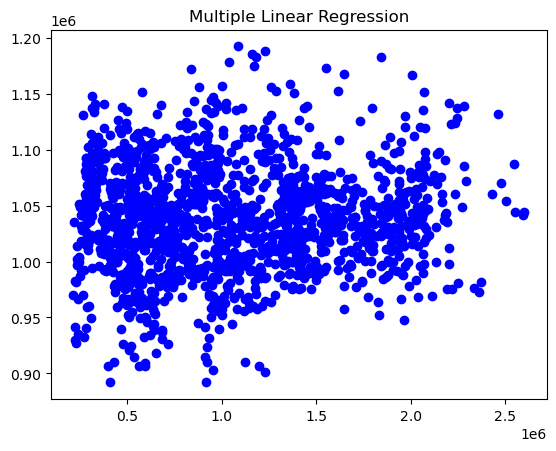

In [39]:
plt.title('Multiple Linear Regression')
plt.scatter(y_test, y_predicted, color='blue')
plt.show()

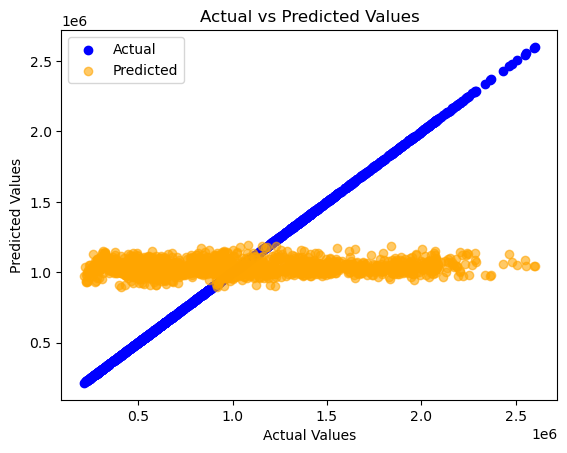

In [40]:
plt.scatter(y_test, y_test, color='blue', label='Actual')
plt.scatter(y_test, y_predicted, color='orange', label='Predicted', alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()

This plot compares **true sales** vs. **model predictions**.

#### Interpretation:
- Ideally, points should lie along the diagonal line (perfect prediction).
- Here, we see a **very scattered cloud**, meaning the model's predictions are often far from actual values.
- There's no clear trend, indicating poor model fit.

## Conclusion
In this analysis, we explored how temperature, fuel price, and unemployment affect weekly sales at Walmart using a multiple linear regression model.

**Key Findings:**
* **Weak Linear Relationships:** The correlation matrix revealed very weak linear relationships between the predictors and weekly sales. All variables (temperature, fuel price, and unemployment) had correlation coefficients close to zero, suggesting limited predictive power individually.

**Model Coefficients:**

* Temperature showed a small negative effect on sales.

* Fuel Price showed a surprising positive relationship.

* Unemployment had a more intuitive negative impact.
These relationships were weak and may not hold strong practical significance.

**Model Performance:**

* R² Score: 0.005, indicating that the model performs worse than simply predicting the mean of weekly sales.

* RMSE: Over $550,000, showing large prediction errors.

* Explained Variance: Also close to zero, reinforcing the model's poor fit.

**Final Thoughts:**

While the hypothesis assumed that temperature, fuel price, and unemployment would help predict weekly sales, the results demonstrate that a linear model with only these three features is insufficient. The relationships are weak, the model explains almost none of the variance, and the prediction errors are large.